In [41]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym.wrappers.monitoring import video_recorder 
from collections import defaultdict

In [22]:
env = gym.make("CartPole-v1")

env.reset()

n_actions = env.action_space
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [137]:
class Q_Agent:
  def __init__(self, actions, eps, alpha, gamma):
    self.possible_actions = actions
    self.q_values = defaultdict(lambda: defaultdict(lambda: 0))
    self.epsilon = eps
    self.alpha = alpha
    self.gamma = gamma
  
  def get_actions(self, state):
    return self.possible_actions

  def set_q(self, state, action, Q):
    self.q_values[state][action] = Q

  def get_value(self, state):
    V = np.max([self.get_q(state, action) for action in self.get_actions(state)])

    return V

  def get_q(self, state, action):
    return self.q_values[state][action]

  def update_q(self, state, action, new_state, reward):
    alpha = self.alpha
    gamma = self.gamma
    Q  = (1 - alpha) * self.get_q(state, action) + alpha * (reward + gamma * self.get_value(new_state))
    self.set_q(state, action, Q)
    
  def get_action(self, state):
    eps = self.epsilon
    if np.random.random() > eps:
      ind_a = np.argmax([self.get_q(state, action) for action in self.get_actions(state)])
      a = self.get_actions(state)[ind_a]
    else:
      a = np.random.choice(self.get_actions(state))

    return a


def generate_trajectory(env, agent, t_max=1000):
  s = env.reset()
  cumulative_reward = 0

  for t in range(t_max):
    a = agent.get_action(s) 
    new_s, r, done, _ = env.step(a)
    agent.update_q(s, a, new_s, r)
    cumulative_reward += r

    if done:
      break

    s = new_s

  return cumulative_reward
   



In [164]:
from gym.core import ObservationWrapper


class Binarizer(ObservationWrapper):
    def observation(self, state):
        state = [round(state[0], 0), round(state[1], 1), 
                 round(state[2], 1), round(state[3], 1)]

        return tuple(state)

12.0
35.0
167.0
111.0
302.0
357.0
80.0
343.0
159.0
204.0


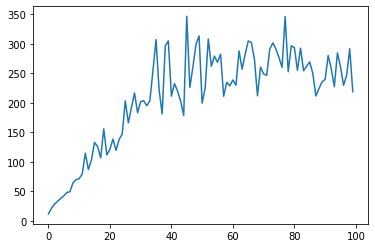

In [167]:
import time
num_episodes = 10000
env = Binarizer(gym.make("CartPole-v1").env)
agent = Q_Agent([0, 1], eps=0.25, alpha=0.2, gamma=0.99)
fig = plt.figure()
ax = fig.add_subplot()
rewards = []
av_rewards = []

for _ in range(num_episodes):
  episode_reward = generate_trajectory(env, agent)
  rewards.append(episode_reward)
  if _ % (num_episodes / 10) == 0: 
    print(episode_reward)
  if _ % 100 == 0:
    av_rewards.append(np.mean(rewards[-100:]))


ax.plot(range(len(av_rewards)), av_rewards)